----
# Asignatura: Técnicas de programación
<left> Nombre: Rodrigo Valdelvira Ortigosa 

<left> Actividad 2: Procesado de datos 

----

El objetivo de esta actividad es practicar el proceso general que se sigue en un proyecto de ciencia de datos. Para eso tenemos que cargar, limpiar, transformar y analizar los datos correspondientes a un dataset.

## 1. Importación de librerías

In [ ]:
# LIBRERÍAS NECESARIAS
# ================================================================

import warnings

import numpy as np
import pandas as pd
import sklearn
import requests
import seaborn as sns

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',  labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

warnings.filterwarnings('ignore')
pd.options.display.max_columns=500

### 2.1 Carga de datos

In [ ]:
# CARGA DE DATOS NECESARIOS
# ================================================================

reservas = pd.read_csv('C:/Users/Rodrigo/Desktop/Master_Big_Data/03.- Técnicas de programación/4.- Actividad 2/reservas.csv', sep=';')
plataformas = pd.read_csv('C:/Users/Rodrigo/Desktop/Master_Big_Data/03.- Técnicas de programación/4.- Actividad 2/platforms.csv', sep=';')

### 2.2 Añadir el campo 'Platform'a reservas

In [ ]:
# VINCULAMOS AMBOS DataFrames 
# ================================================================

#agregamos el campo 'Platform' además de asociar los nombrers de los vendedores.
raw_data = pd.merge(reservas, plataformas, on='Code vendor', how='left') \
 .drop('Code vendor', axis=1) # Eliminamos la columna 'Code vendor' porque es redudante para nuestro análisis

In [ ]:
# Copiamos el dataset orginal para poder operar a partir de ahora sobre 'data'.
data = raw_data.copy()

## 3. Exploración de datos EDA (Exploratory Data Analysis)

In [ ]:
# PRINCIPALES CARACTERÍSTICAS
# ================================================================

print(data.shape)  # devuelve las dimensiones
print(data.size)   # devuelve el número total de valores
data.head()        # devuleve las primeras cinco observaciones

(119390, 15)
1790850


,hotel,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,total_of_special_requests,Vendor,Platform
0,Resort Hotel,0,342,27,NaN,NaN,2.0,0.0,0,0,0,0,0,Eduardo,Booking
1,Resort Hotel,0,737,27,NaN,NaN,2.0,0.0,0,0,0,0,0,María,Booking
2,Resort Hotel,0,7,27,0.0,1.0,1.0,0.0,0,0,0,0,0,Alejandro,Trivago
3,Resort Hotel,0,13,27,0.0,1.0,1.0,0.0,0,0,0,0,0,Juan,Booking
4,Resort Hotel,0,14,27,0.0,2.0,2.0,0.0,0,0,0,0,1,Pedro,TripAdvisor


In [ ]:
# ANÁLISIS DESCRIPTIVO DE LAS VARIABLES NUMÉRICAS
# ================================================================

# Descripción de las variables
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390,NaN,NaN,NaN,0.370416,0.482918,0,0,0,1,1
lead_time,119390,NaN,NaN,NaN,104.011,106.863,0,18,69,160,737
arrival_date_week_number,119390,NaN,NaN,NaN,27.1652,13.6051,1,16,28,38,53
stays_in_weekend_nights,119333,NaN,NaN,NaN,0.928042,0.998646,0,0,1,2,19
stays_in_week_nights,119335,NaN,NaN,NaN,2.50145,1.90797,0,1,2,3,50
adults,118987,NaN,NaN,NaN,1.86269,0.57006,1,2,2,2,55
children,119386,NaN,NaN,NaN,0.10389,0.398561,0,0,0,0,10
babies,119390,NaN,NaN,NaN,0.00794874,0.0974362,0,0,0,0,10
is_repeated_guest,119390,NaN,NaN,NaN,0.0319122,0.175767,0,0,0,0,1


- *Variables*: El dataset está compuesto de 12 variables numéricas.
- *Variables binarias*: Se intuye que las variables `is_canceled`, e `is_repeted_guest` son binarias (0,1).
- *Variables categóricas*: `hotel` (moda: City Hotel), `Vendor` (moda: Alejandro) y `Platform` (moda: Trivago)
- *Variables discretas*: Se aprecia que a excepción de las tres anteriores el resto recorren rangos de valores concretos.

In [ ]:
# VALORES FALTANTES Y TIPOS DE DATOS
# ================================================================

# Sustituimos valores anómalos interpretados por python con '?' por NaN.
data.replace("?", np.nan, inplace = True)

# función que calcula el número total de observaciones perdidas, porcentaje y tipo de datos.
def missing_data(df):
    total   =  df.isnull().sum()
    percent = (df.isnull().sum().div(df.count())*100).round(3)
    df_missing_data = pd.DataFrame(({'NaN': total, '%': percent, 'types': df.dtypes}))
    return df_missing_data

In [ ]:
# Aplicamos la función anterior
missing_data(data)

,NaN,%,types
hotel,0,0.000,object
is_canceled,0,0.000,int64
lead_time,0,0.000,int64
arrival_date_week_number,0,0.000,int64
stays_in_weekend_nights,57,0.048,float64
stays_in_week_nights,55,0.046,float64
adults,403,0.339,float64
children,4,0.003,float64
babies,0,0.000,int64
is_repeated_guest,0,0.000,int64


- Las variables `stays_in_weekend_nights`, `stays_in_week_nights`, `adults`, y `children` tienen elementos faltantes NaN.

In [ ]:
# VARIABLES CATEGÓRICAS Y DISCRETAS
# ================================================================

# Análisis de las frecuencias de las variables categóricas
print(data['hotel'].value_counts().sort_index(),'\n')
print(data['Platform'].value_counts().sort_index(), '\n')
print(data['is_canceled'].value_counts().sort_index(), '\n')
print(data['Vendor'].value_counts().sort_index(), '\n')
print(data['total_of_special_requests'].value_counts().sort_index(), '\n')
print(data['is_repeated_guest'].value_counts().sort_index(), '\n')
print(data['adults'].value_counts().sort_index(), '\n')
print(data['children'].value_counts().sort_index(), '\n')
print(data['babies'].value_counts().sort_index(), '\n')
print(data['arrival_date_week_number'].value_counts().sort_index(), '\n')
print(data['previous_cancellations'].value_counts().sort_index(), '\n')

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64 

Booking        47528
TripAdvisor    23835
Trivago        48027
Name: Platform, dtype: int64 

0    75166
1    44224
Name: is_canceled, dtype: int64 

Alejandro    12133
Almudena     11980
Andrés       11938
Eduardo      11813
Juan         11982
Lucía        11976
María        11764
Pedro        11866
Raquel       11969
Sandra       11969
Name: Vendor, dtype: int64 

0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64 

0    115580
1      3810
Name: is_repeated_guest, dtype: int64 

1.0     23027
2.0     89680
3.0      6202
4.0        62
5.0         2
6.0         1
10.0        1
20.0        2
26.0        5
27.0        2
40.0        1
50.0        1
55.0        1
Name: adults, dtype: int64 

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64 

0     118473
1        900
2         15
9          1
10         1

In [ ]:
# VALORES ÚNICOS
# =============================================================================================================

# Calculamos el número de valores únicos de cada variable
pd.DataFrame({'feature_names': data.columns,  'unique_values': (len(data[k].unique()) for k in data.columns)}) \
  .sort_values('unique_values', ascending=False)    

,feature_names,unique_values
2,lead_time,479
11,previous_bookings_not_canceled,73
3,arrival_date_week_number,53
5,stays_in_week_nights,36
4,stays_in_weekend_nights,18
10,previous_cancellations,15
6,adults,14
13,Vendor,10
7,children,6
12,total_of_special_requests,6


- Como intuíamos existen dos variables binarias: `is_canceled` y `is_repeated_guest`.
- Existen tres variables categóricas directas `hotel`, `Platform` y `Vendor`, no obstante sabemos que `arrival_date_week_number` no debe tratarse como una variable numérica porque el número de la semana en la que se ha hecho una reserva puede llevar a equívocos, por ejemplo un algoritmo podría ponderar más una reserva hecha la semana S53 que otra la semana S1 cuando podrían tener la misma relevancia por trataser de semanas de navidad. 
- La mayor parte de `special_request` están concentradas entre 0 y 2.
- El número de `adultos` está concentrado entre 1 y 3, el de `children` 1 y 2 y `babies` 0 y 1.

## 4. Estrategia de gestión de valores faltantes

A pesar de que la elmininación de todos los elementos faltantes podría ser una buena opción porque a penas representan un 0.4% vamos a sustituirlos por la moda de cada una de sus variables

In [ ]:
# APLICACIÓN DE LA MODA EN LOS VALORES FALTANTES
# ================================================================

nan = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children']

for i in nan:
    data[i].fillna(data[i].mode()[0], inplace=True)

## 5. Transformación de variables categóricas

Tras el análisis anterior vamos a proceder a transformar la variable numérica `arrival_date_week_number`en categórica. Podríamos transformarla directamnete mediante variables *dummy* o *OneHotEncoder* agregando 53 nuevas columnas pero parece razonable agrupar las semanas en una clasificación que revele más información como si es temporada alta o baja.

- *Temporada Alta*: De noviembre hasta abril y desde el 22 de junio, Julio y agosto. S44-S54; S1-S19; S27-37;
- *Temporada Baja*: Abril + Mayo + hasta el 22 de junio + Septiembre a octubre. S19-27; S36-45

In [ ]:
# TRANSFORMACIÓN DE SEMANAS EN TEMPORADA ALTA Y BAJA
# =========================================================================

high_seasson = [*range(1,19), *range(27,36), *range(44,54)]

def seasson (week):
    if week in high_seasson:
        return 'high'
    else:
        return 'low'
    
data['seasson'] = data['arrival_date_week_number'].apply(lambda x: seasson(x))

Vamos a proceder también a incluir la variable 'month' puesto que va a ampliar la información de la categoría anterior.

In [ ]:
# TRANSFORMAICÓN DE SEMANAS EN MESES (CONSIDERANDO LA DISTRIBUCIÓN DEL 2020)
# =========================================================================

# Diccionario con los meses y los rangos de las semanas que recorren.
months = {
         'enero'      :  range(1,5),
         'febrero'    :  range(5,10),
         'marzo'      :  range(10,14),
         'abril'      :  range(14,18),
         'mayo'       :  range(18,23),
         'junio'      :  range(23,27),
         'julio'      :  range(27,31),
         'agosto'     :  range(31,36),
         'septiembre' :  range(36,40),
         'octubre'    :  range(40,44),
         'noviembre'  :  range(44,49),
         'diciembre'  :  range(49,54),
        }

# Función para asignar el mes al que pertenece cada semana
def month (week):
    for i in months:
        if week in months[i]:
            return i

# Creamos una nueva variable 'month' en la que aplicamos la función anterior.
data['month'] = data['arrival_date_week_number'].apply(lambda x: month(x))

In [ ]:
# Eliminamos la variable 'arrival_date_week_number'.
data.drop('arrival_date_week_number', axis=1, inplace=True);

Aunque se trate del apartado 9. de la actividad, tiene sentido incluir ahora la variable `past_canceled_per_reservations` que calcula el porcentaje de reservas canceladas sobre el total de reservas realizadas en el pasado para completar el dataset antes de cualquier otra transformación. Para ello dividimos `previous_cancellations` entre `previous_bookings_not_canceled` + `previous_cancellations`.

In [ ]:
# NUEVA VARIABLE 'past_canceled_per_reservations' 
# =========================================================================

# Puesto que hay muchas cancelacioens igual a cero, añadimos el método .replace(np.inf, np.nan) para sustituir los 'inf' derivados de dividir entre cero.  
data['past_canceled_per_reservations'] = data['previous_cancellations'] \
                                        .div(data['previous_bookings_not_canceled'] + data['previous_cancellations']) \
                                        .replace(np.inf, np.nan) \
                                        .fillna(0)*100 # remplazamos nan por cero y multiplicamos por 100 para obtener porcentaje

In [ ]:
# DATASET FINAL CON TODAS LAS VARIABLES NUMÉRICAS Y CATEGÓRICAS ADICIONALES 
# =========================================================================

data

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,total_of_special_requests,Vendor,Platform,seasson,month,past_canceled_per_reservations
0,Resort Hotel,0,342,0.0,2.0,2.0,0.0,0,0,0,0,0,Eduardo,Booking,high,julio,0.0
1,Resort Hotel,0,737,0.0,2.0,2.0,0.0,0,0,0,0,0,María,Booking,high,julio,0.0
2,Resort Hotel,0,7,0.0,1.0,1.0,0.0,0,0,0,0,0,Alejandro,Trivago,high,julio,0.0
3,Resort Hotel,0,13,0.0,1.0,1.0,0.0,0,0,0,0,0,Juan,Booking,high,julio,0.0
4,Resort Hotel,0,14,0.0,2.0,2.0,0.0,0,0,0,0,1,Pedro,TripAdvisor,high,julio,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2.0,5.0,2.0,0.0,0,0,0,0,0,María,Booking,high,agosto,0.0
119386,City Hotel,0,102,2.0,5.0,3.0,0.0,0,0,0,0,2,Andrés,Trivago,high,agosto,0.0
119387,City Hotel,0,34,2.0,5.0,2.0,0.0,0,0,0,0,4,Pedro,TripAdvisor,high,agosto,0.0
119388,City Hotel,0,109,2.0,5.0,2.0,0.0,0,0,0,0,0,Sandra,Booking,high,agosto,0.0


## 6. Representación gráfica de las variables

### 6.1 Variables categóricas

Debido a que las variables categóricas juegan un papel importante en este dataset vamos a representar gráficamente algunas de ellas en función de nuestra variable objetivo `is_canceled`.
- Agrupación en función de `Vendor` incluyendo número de cancelaciones, total de reservas y sus porcentajes (respecto al vendedor y al total).

In [ ]:
# GROUP1.1 CODE VENDOR (TABLA)
# =========================================================================

# Selección de las cancelaciones por vendedor
group_11 = data.loc[data['is_canceled']==1, ['Vendor','is_canceled']] \
        .groupby('Vendor', as_index=False).count()

# Selección de las reservas totales por vendedor
group_12 = data[['is_canceled', 'Vendor']] \
        .groupby('Vendor', as_index=False).count()

# Adición de nuevas columnas al df
group_11['total_reser']       = group_12['is_canceled']
group_11['%partial_canceled'] = group_11['is_canceled'].div(group_11['total_reser'])*100
group_11['%total_canceled']   = group_11['is_canceled'].div(len(data))*100

group_11.round(2)

,Vendor,is_canceled,total_reser,%partial_canceled,%total_canceled
0,Alejandro,4505,12133,37.13,3.77
1,Almudena,4453,11980,37.17,3.73
2,Andrés,4456,11938,37.33,3.73
3,Eduardo,4398,11813,37.23,3.68
4,Juan,4410,11982,36.81,3.69
5,Lucía,4395,11976,36.70,3.68
6,María,4422,11764,37.59,3.70
7,Pedro,4264,11866,35.93,3.57
8,Raquel,4493,11969,37.54,3.76
9,Sandra,4428,11969,37.00,3.71


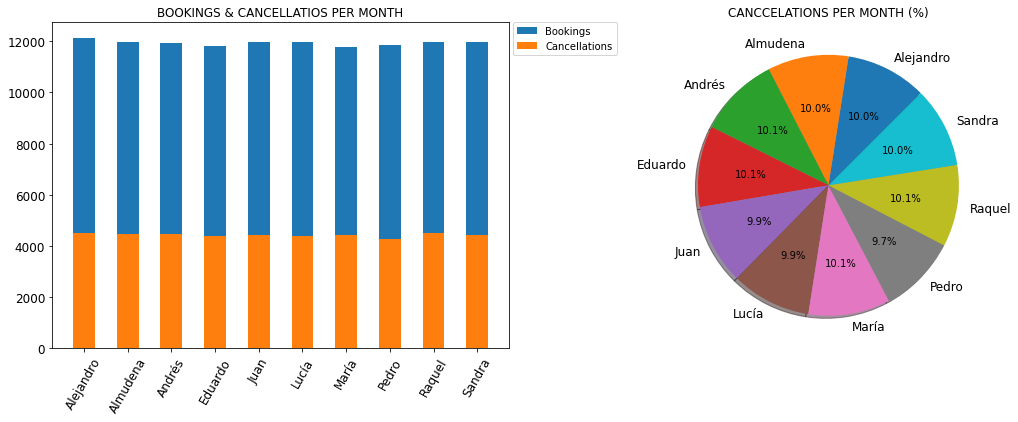

In [ ]:
# GROUP1.1 CODE VENDOR (GRÁFICOS)
# =========================================================================

x = np.arange(10)
width = 0.5

plt.figure(figsize=(18, 6))

# Gráfico de barras
plt.subplot(121)
plt.bar(x, 'total_reser', width, label='Bookings',      data=group_11)
plt.bar(x, 'is_canceled', width, label='Cancellations', data=group_11)
plt.xticks(range(10), group_11['Vendor'], rotation=60)
plt.legend(loc=(1.01, 0.9))
plt.title('BOOKINGS & CANCELLATIOS PER MONTH')

# Gráfico de sectores
plt.subplot(122)
plt.pie('%partial_canceled', labels='Vendor', startangle=45, shadow=True, autopct='%1.1f%%', data=group_11)
plt.title('CANCCELATIONS PER MONTH (%)');

Es curioso ver que tanto la distribución de reservas como de cancelaciones es muy uniforme para cada vendedor.

- Agrupación en función de `month` incluyendo número de cancelaciones, total de reservas y sus porcentajes (respecto al mes y al total).

In [ ]:
# GROUP2.1 MONTH (TABLA)
# =========================================================================

# Selección de las cancelaciones por mes
group_21 = data.loc[data['is_canceled']==1, ['is_canceled', 'month']] \
        .groupby('month').count()

# Selección de las reservas totales por mes
group_22 = data[['is_canceled', 'month']] \
        .groupby('month').count()

# Adición de nuevas columnas al df
group_21['total_reser']       = group_22['is_canceled']
group_21['%partial_canceled'] = group_21['is_canceled'].div(group_21['total_reser'])*100
group_21['%total_canceled']   = group_21['is_canceled'].div(len(data))*100

# Ordenamos de acuerdo al mes (enero, febrero, marzo...)
group_21_order = group_21.reindex(months.keys()).round(2)
group_21_order

,is_canceled,total_reser,%partial_canceled,%total_canceled
month,,,,
enero,1589,5071,31.34,1.33
febrero,3011,9337,32.25,2.52
marzo,2867,8718,32.89,2.40
abril,4039,10163,39.74,3.38
mayo,5471,13513,40.49,4.58
junio,4195,10173,41.24,3.51
julio,4293,11367,37.77,3.60
agosto,5633,14999,37.56,4.72
septiembre,3715,9638,38.55,3.11


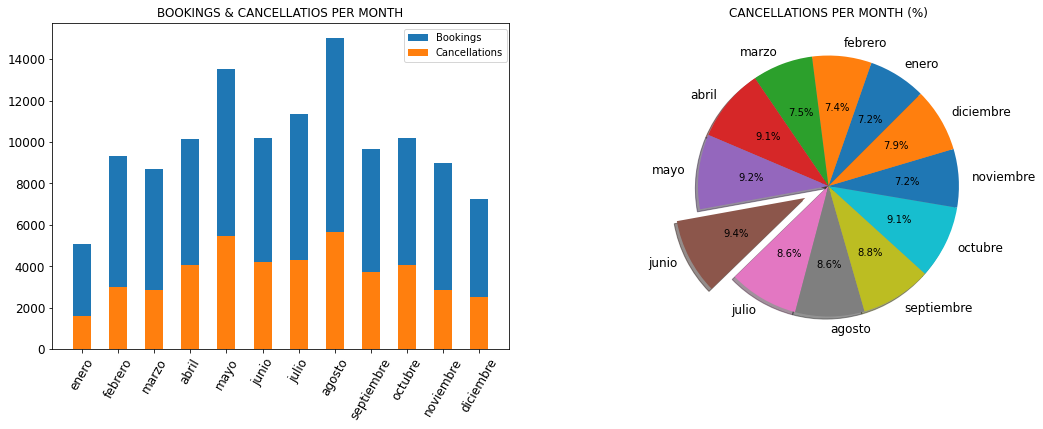

In [ ]:
# GROUP2.1 MONTH (GRÁFICAS)
# =========================================================================

x = np.arange(12)
width = 0.5

# Gráfico de barras
plt.figure(figsize=(18, 6))
plt.subplot(121)
plt.bar(x, 'total_reser', width, label = 'Bookings',      data=group_21_order)
plt.bar(x, 'is_canceled', width, label = 'Cancellations', data=group_21_order)
plt.xticks(range(12), months.keys(), rotation=60)
plt.legend(loc=(0.77, 0.88))
plt.title('BOOKINGS & CANCELLATIOS PER MONTH')

# Gráfico de sectores
maxi    = np.zeros(12)
maxi[5] = 0.2

plt.subplot(122)
plt.pie('%partial_canceled', labels=months.keys(), startangle = 45, explode=maxi, shadow=True, autopct='%1.1f%%', data=group_21_order)
plt.title('CANCELLATIONS PER MONTH (%)');

Se observa que agosto y mayo son los meses con mayor número de reservas y cancelaciones y junio con más cancelaciones en relación a sus reservas.

- Agrupación en función de `Platform` incluyendo número de cancelaciones, total de reservas y sus porcentajes (respecto a la plataforma y al total).

In [ ]:
# GROUP3.1 PLATFORM (TABLA)
# =========================================================================

# Selección de las cancelaciones por plataforma
group_31 = data.loc[data['is_canceled']==1, ['Platform','is_canceled']] \
        .groupby('Platform', as_index=False).count()

# Selección de las reservas totales por plataforma
group_32 = data[['is_canceled', 'Platform']] \
        .groupby('Platform', as_index=False).count()

# Adición de nuevas columnas al df
group_31['total_reser']       = group_32['is_canceled']
group_31['%partial_canceled'] = group_31['is_canceled'].div(group_31['total_reser'])*100
group_31['%total_canceled']   = group_31['is_canceled'].div(len(data))*100

group_31.round(2)

,Platform,is_canceled,total_reser,%partial_canceled,%total_canceled
0,Booking,17658,47528,37.15,14.79
1,TripAdvisor,8757,23835,36.74,7.33
2,Trivago,17809,48027,37.08,14.92


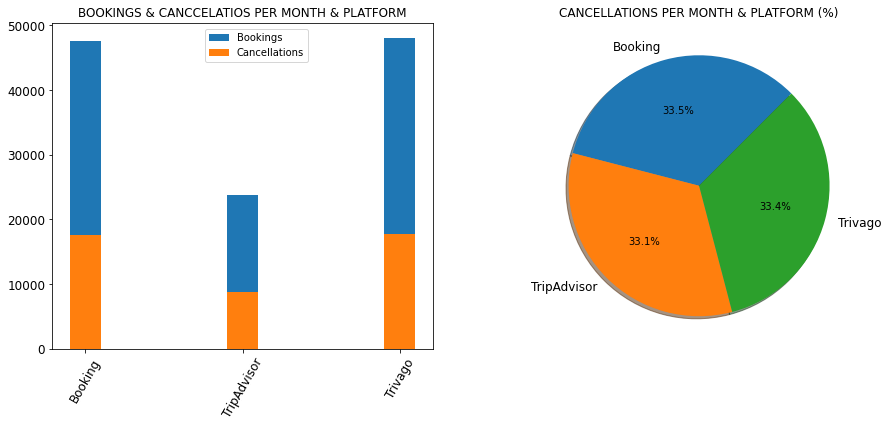

In [ ]:
# GROUP3.1 PLATFORMS (GRÁFICAS)
# =========================================================================

x = np.arange(3)
width = 0.2

plt.figure(figsize=(15, 6))

# Gráfico de barras
plt.subplot(121)
plt.bar(x, 'total_reser', width, label= 'Bookings',      data=group_31)
plt.bar(x, 'is_canceled', width, label ='Cancellations', data=group_31 )
plt.xticks(range(3), group_31['Platform'], rotation=60)
plt.legend(loc=(0.4, 0.88))
plt.title('BOOKINGS & CANCCELATIOS PER MONTH & PLATFORM')

# Gráfico de sectores
plt.subplot(122)
plt.pie(group_31['%partial_canceled'], labels='Platform', startangle=45, shadow=True, autopct='%1.1f%%', data=group_31)
plt.title('CANCELLATIONS PER MONTH & PLATFORM (%)');

Se observa que las plataformas Booking y Trivago recogen más número de reservas y cancelaciones pero en términos relativos tienen la misma proporción las tres, $\approx 33$%.

- Agrupación en función de `month`, `hotel` y `platform`

In [ ]:
# GROUP4.1 MONTH, HOTEL, PLATFORM (TABLA)
# =========================================================================

# Selección de las cancelaciones por 'month', 'Platform', 'hotel' 
group_41 = data.loc[data['is_canceled']==1, ['is_canceled', 'month', 'Platform', 'hotel']] \
        .groupby(['month', 'Platform', 'hotel'], as_index=False).count()

# Selección de las reservas totales por 'month', 'Platform', 'hotel'
group_42 = data[['is_canceled', 'month', 'Platform', 'hotel']] \
        .groupby(['month', 'Platform', 'hotel'], as_index=False).count()

# Adición de nuevas columnas al df
group_41['total_reser']       = group_42['is_canceled']
group_41['%partial_canceled'] = group_41['is_canceled'].div(group_41['total_reser'])*100
group_41['%total_canceled']   = group_41['is_canceled'].div(len(data))*100

# Agrupamos nuevamente de acuerdo al máximo de cancelaciones
group_41.groupby(['month', 'hotel', 'Platform']).max().round(2)

is_canceled  total_reser  \
month      hotel        Platform                                
abril      City Hotel   Booking             1236         2738   
                        TripAdvisor          645         1376   
                        Trivago             1301         2809   
           Resort Hotel Booking              339         1269   
                        TripAdvisor          155          641   
...                                          ...          ...   
septiembre City Hotel   TripAdvisor          523         1360   
                        Trivago             1110         2685   
           Resort Hotel Booking              388         1162   
                        TripAdvisor          187          594   
                        Trivago              381         1155   

                                     %partial_canceled  %total_canceled  
month      hotel        Platform                                         
abril      City Hotel   Booking                  45.14             1.04  
                        TripAdvisor              46.88             0.54  
                        Trivago                  46.32             1.09  
           Resort Hotel Booking                  26.71             0.28  
                        TripAdvisor              24.18             0.13  
...                                                ...              ...  
septiembre City Hotel   TripAdvisor              38.46             0.44  
                        Trivago                  41.34             0.93  
           Resort Hotel Booking                  33.39             0.32  
                        TripAdvisor              31.48             0.16  
                        Trivago                  32.99             0.32  

[72 rows x 4 columns]

Esta última tabla nos permite discernir a un nivel más preciso la distribució de cancelaciones conociendo el máximo de cancelaciones por `month`, `hotel` y `Platform`.

### 6.2 Variables numéricas

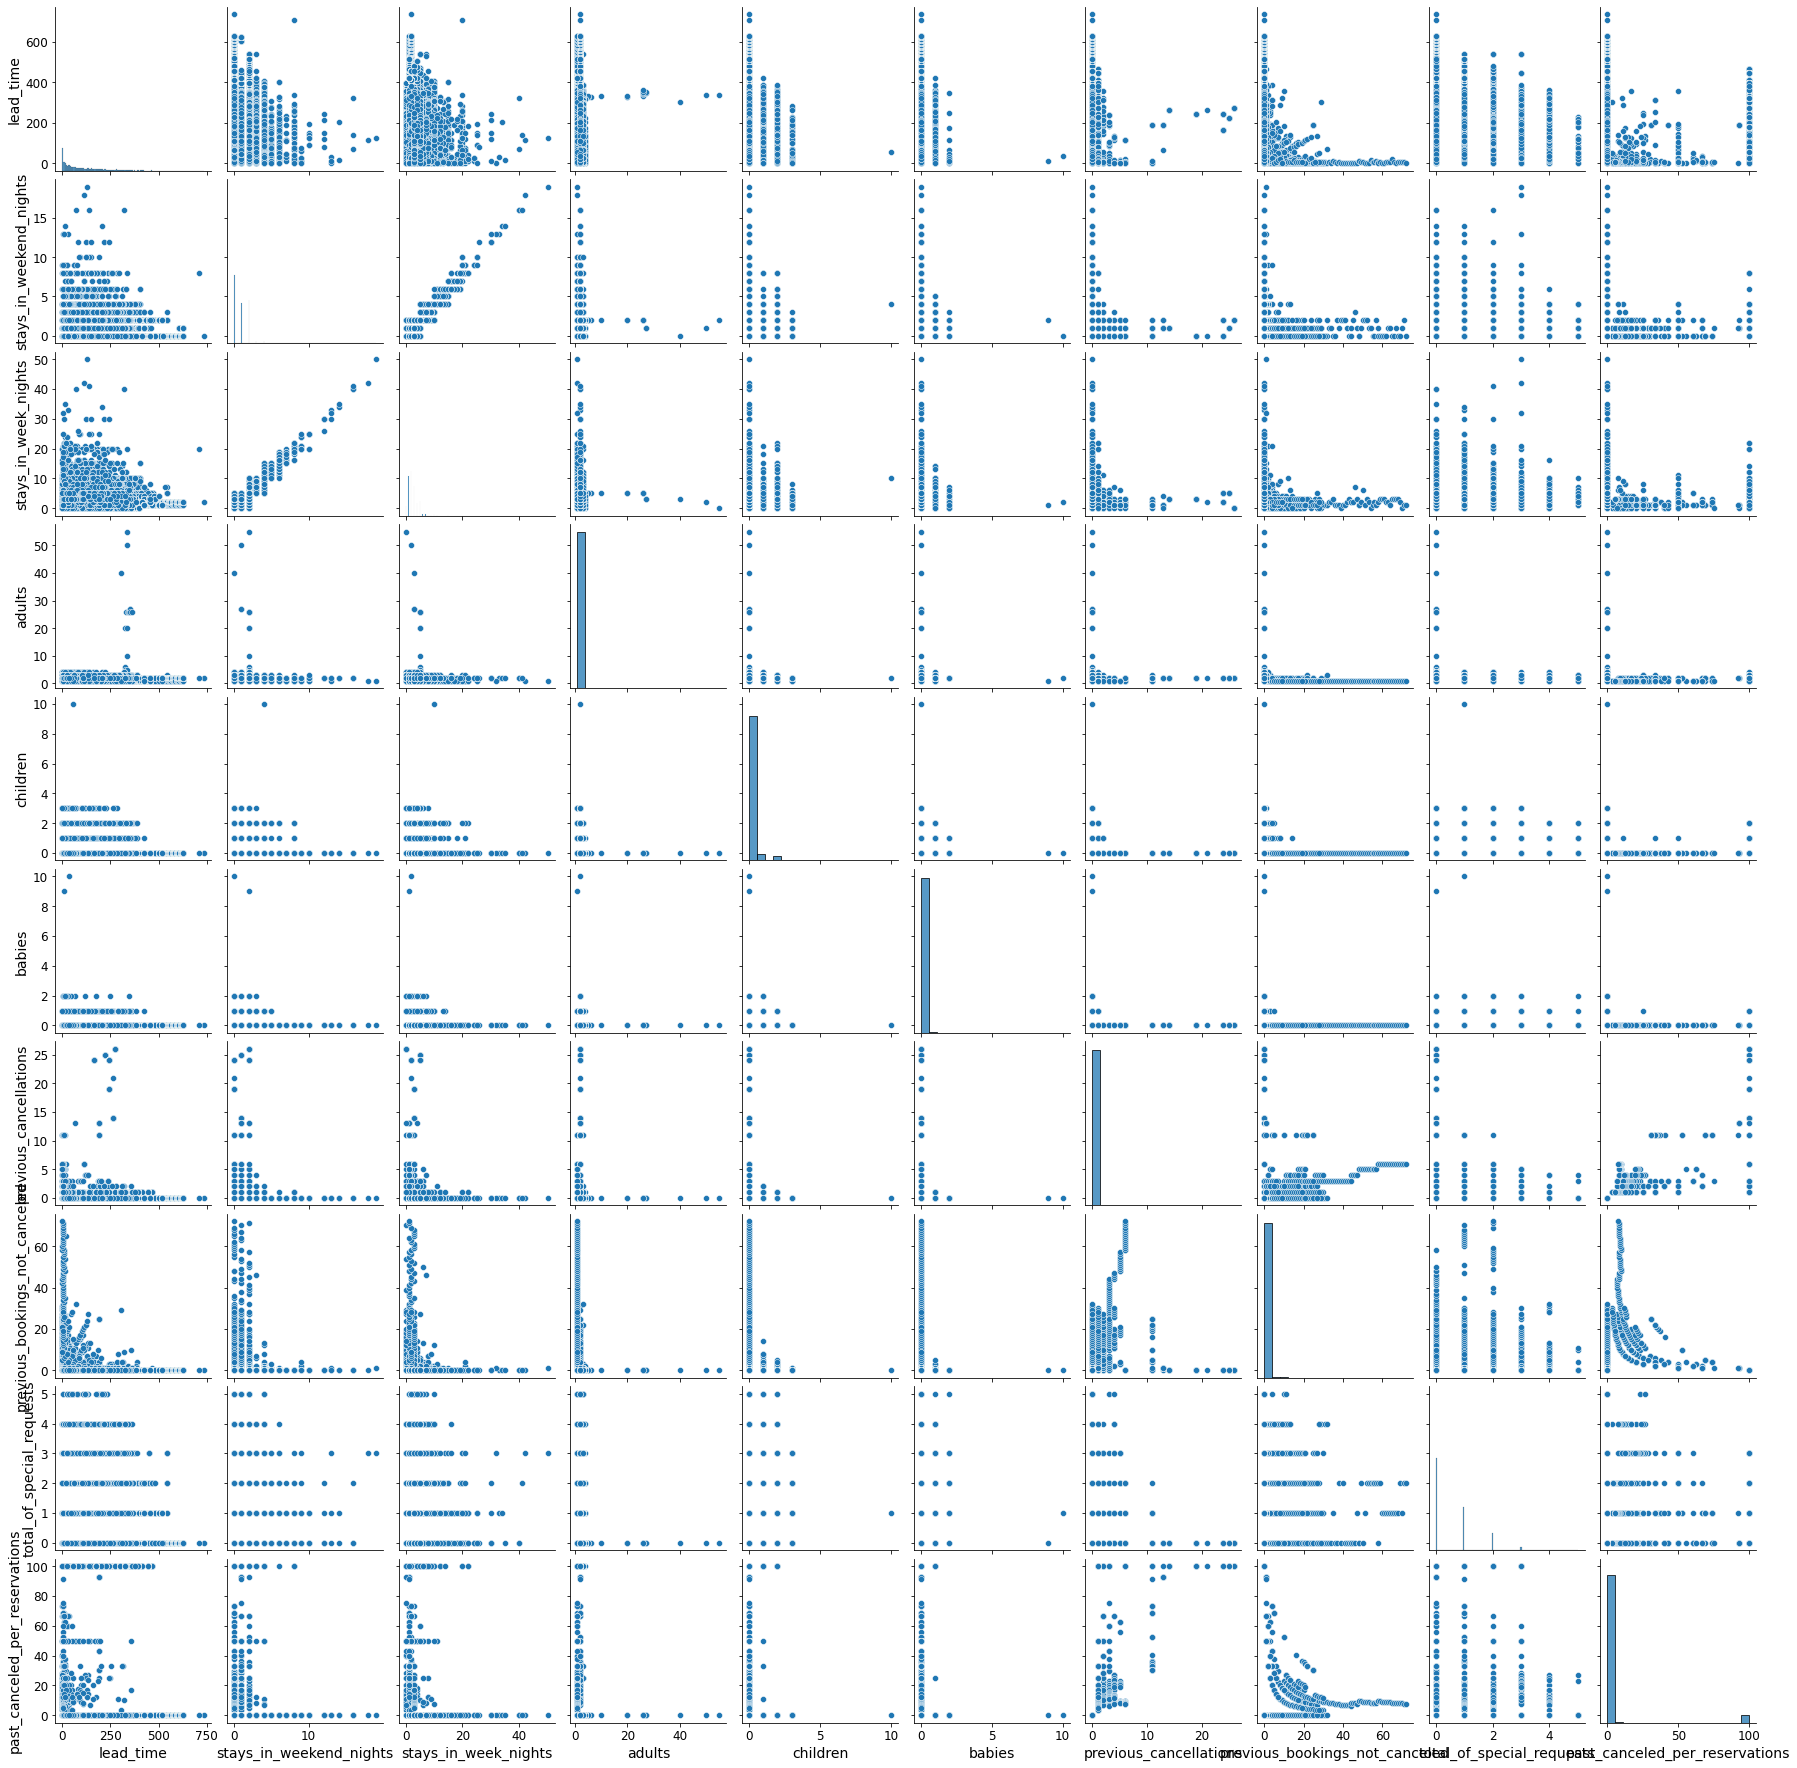

In [ ]:
# REPRESENTACIÓN BIDIMENSIONAL
# =========================================================================

# Representación por parejas de las variables numéricas que nos permitirán entender mejor sus relaciones (también omitimos las variables binarias 'is_canceled'&'is_repeated_guest'). 

num_attribs = ['lead_time', 'stays_in_weekend_nights','stays_in_week_nights', 
               'adults', 'children', 'babies', 'previous_cancellations', 
               'previous_bookings_not_canceled', 'total_of_special_requests', 
               'past_canceled_per_reservations']

sns.pairplot(data[num_attribs]);

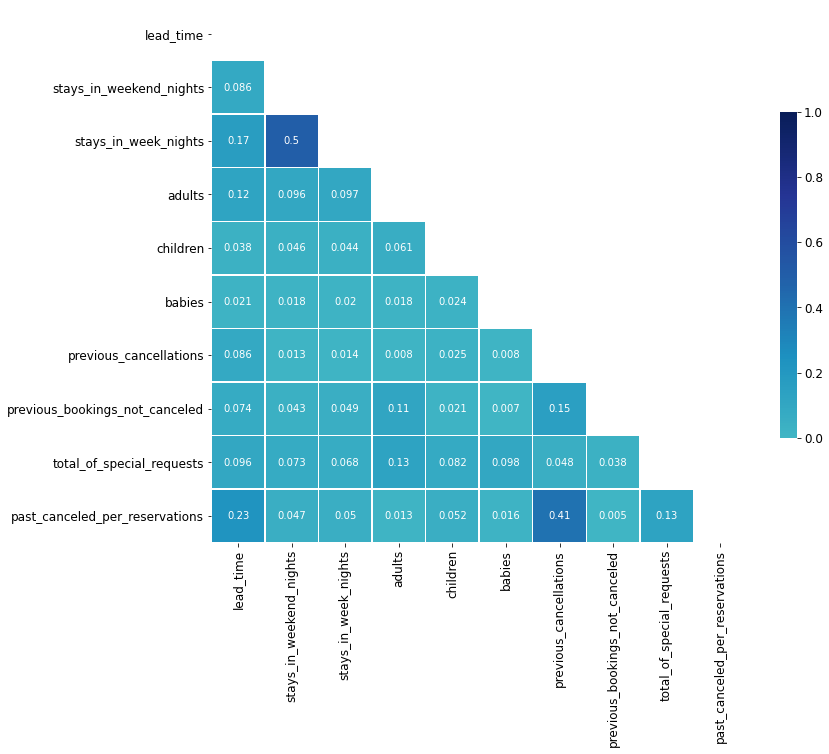

In [ ]:
# COEFICIENTES DE CORRELACIÓN
# ================================================================

# Representación del coeficiente de correlación lineal de Pearson que independientemente de la escala representa el grado de linealidad
# corr = 1 o -1: correlación perfecta, corr = 0 ausencia de corrleación.
# Los valores se han tomado en valor absoluto.

corr = data[num_attribs].corr().abs().round(3)
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, mask=mask, cmap="YlGnBu", vmin = 0.0, vmax=1.0, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

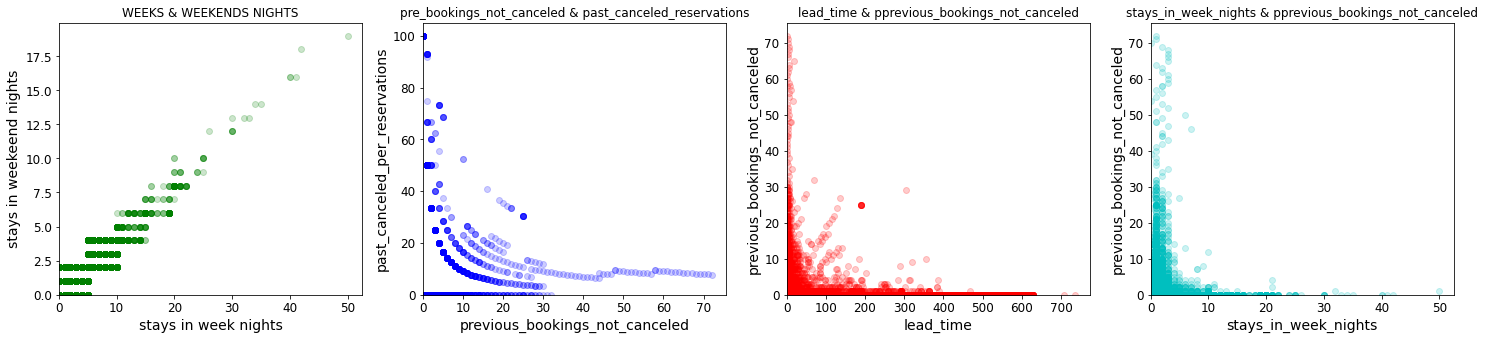

In [ ]:
#  RELACIONES RELEVANTES
# ================================================================

plt.figure(figsize=(25, 5))

plt.subplot(141)
plt.scatter(x="stays_in_week_nights", y="stays_in_weekend_nights", data=data, color='g', alpha=0.2)
plt.title('WEEKS & WEEKENDS NIGHTS')
plt.xlabel('stays in week nights')
plt.ylabel('stays in weekeend nights')
plt.xlim(0,)
plt.ylim(0,);

plt.subplot(142)
plt.scatter(x="previous_bookings_not_canceled", y="past_canceled_per_reservations", data=data, color='b', alpha=0.2)
plt.title('pre_bookings_not_canceled & past_canceled_reservations')
plt.xlabel('previous_bookings_not_canceled')
plt.ylabel('past_canceled_per_reservations')
plt.xlim(0,)
plt.ylim(0,)

plt.subplot(143)
plt.scatter(x="lead_time", y="previous_bookings_not_canceled", data=data, color='r', alpha=0.2)
plt.title('lead_time & pprevious_bookings_not_canceled')
plt.xlabel('lead_time')
plt.ylabel('previous_bookings_not_canceled')
plt.xlim(0,)
plt.ylim(0,);

plt.subplot(144)
plt.scatter(x="stays_in_week_nights", y="previous_bookings_not_canceled", data=data, color='c', alpha=0.2)
plt.title('stays_in_week_nights & pprevious_bookings_not_canceled')
plt.xlabel('stays_in_week_nights')
plt.ylabel('previous_bookings_not_canceled')
plt.xlim(0,)
plt.ylim(0,);

- Las variables `stays_in_week_nights` y `stays_in_weekend_nights` destacan por su correlación lineal. **corr: 0.5**.
- Las variables `previous_bookings_not_canceled` vs `past_canceled_per_reservations` describen una relación exponencial, tiene sentindo que estén correlacionadas de algún modo porque `past_canceled_per_reservations` es una variable artificial derivada de la anterior.
- Las variables `lead_time` y `previous_bookings_not_canceled` intuyen una relación exponencial.
- Las variables `stays_in_week_nights` y `previous_bookings_not_canceled` también describen una relación similar al caso anterior.

## 7. Transformación de variables

Antes de aplicar culalquier transformación vamos a simular un verdadero modelo de ML dividiendo el dataset con todas las variables en un dataset de entrenamiento (80%) y otro de prueba (20%).

In [ ]:
# DIVISIÓN DEL DATASET
# ================================================================

# Importamos la función que nos permitirá dividir nuestros datos en train & test.
from sklearn.model_selection import train_test_split

# Separamos los datos X: Matriz de variables independientes, y: variable objetivo (is_canceled). 
X = data.drop(['is_canceled'], axis = 1)
y = data['is_canceled']

# Separamos el dataset reservando un 20% de los elementos para comprobar el modelo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

A través de un pipeline aplicamos dos transformaciones:
- *StandarScaler*: Estandariazamos las variables numéricas aproximándolas a distribuciones $\mu=0$ y $\sigma=1$; $X_n \approx N(0,1)$.
- *OneHotEncoder*: Transformación de las variables categóricas en numéricas asignando columnas individuales a cada una con codificación binaria.

Los clasificadores no se ven afectados por lo general a las anteriores transformacioens por lo que no serían necesarias, no obstante las aplicaremos para completar la actividad.

In [ ]:
# TRANSFORMACIÓN DE VARIABLES
# ================================================================

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

cat_attribs = ['hotel', 'Vendor', 'Platform', 'seasson', 'month','is_repeated_guest']

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

# Una vez que se ha definido el objeto ColumnTransformer, con el método fit()
# se aprenden las transformaciones con los datos de entrenamiento y se aplican a
# los dos de prueba con transform().
X_train_prep = full_pipeline.fit_transform(X_train) # Ambas operaciones a la vez con fit_transform().
X_test_prep  = full_pipeline.transform(X_test)

In [ ]:
# Convertir el output del ColumnTransformer en dataframe y añadir nombre columnas
# ==============================================================================

# Nombre de todas las columnas
encoded_cat = full_pipeline.named_transformers_['cat'].get_feature_names(cat_attribs)
labels      = np.concatenate([num_attribs, encoded_cat])

# Conversión a dataframe
X_train_prep = pd.DataFrame(X_train_prep, columns=labels)
X_test_prep  = pd.DataFrame(X_test_prep, columns=labels)

## 8. Significancia de las variables

Una vez transformado todo el dataset analizemos la significancia de las variables, esto nos dará información sobre que características tienen más influencia en la cancelación de las reservas. 
- *f_class*: Evalúa la significancia del coeficiente de correlación de Pearson.
- *mutual_info_classif*: Estima la información mutua entre cada característica y la variable objetivo (relaciones no lineales).

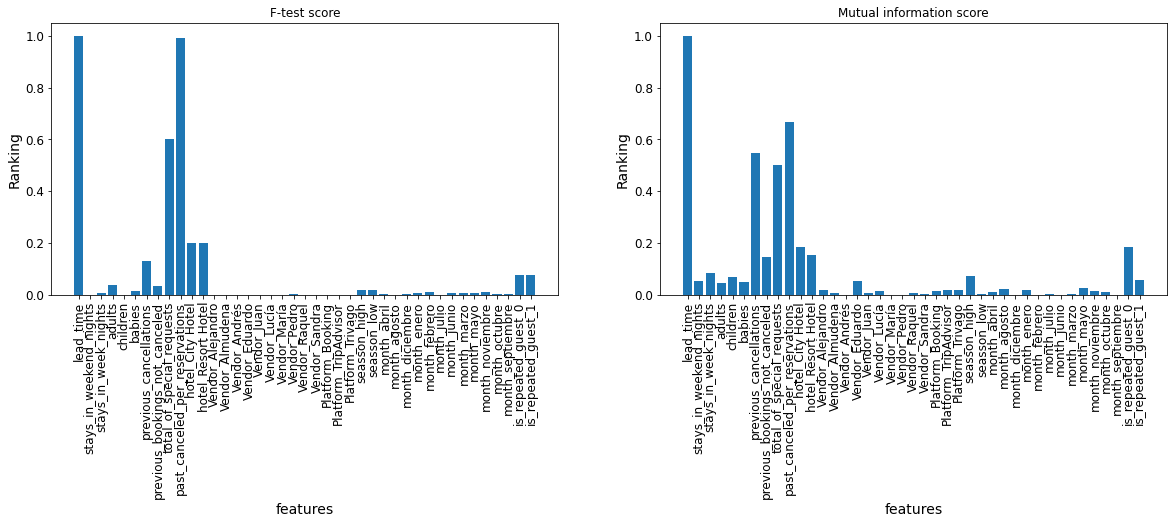

In [ ]:
# SIGNIFICANCIA DE LAS VARIABLES
# ================================================================

from sklearn.feature_selection import f_classif, mutual_info_classif

# Utilizamos el dataset de entrenamiento
X = X_train_prep
y = y_train
features_names = X_train_prep.columns

# f_class
f_test,_ = f_classif(X, y)
f_test  /= np.max(f_test)

# mutual_info_classif
mi   = mutual_info_classif(X, y)
mi  /= np.max(mi)

plt.figure(figsize=(20, 5))

# Gráficos
plt.subplot(1,2,1)
plt.bar(range(X.shape[1]), f_test, align="center")
plt.xticks(range(X.shape[1]), features_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('F-test score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]), mi, align="center")
plt.xticks(range(X.shape[1]), features_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

- Entre las relacioens lineales destacan `lead time`, `total_of_special_requestes` y `past_canceled_per_reservations`y en menor medida `City_Hotel` y `Resort_Hotel` y `previous_cancellations`.
- Las relacioens no lineales coinciden en destacar `lead time`, `total_of_special_requestes`, y `previous_cancellations` y además aporta en menor medida `not_repeated_guest`, `previous_bookings_not_canceled` y `City_Hotel`
>Tras entrenar un primer modelo podríamos comparar la bondad de la métrica seleccionada para evaluarlo considerando tan solo las variables más significativas y comprobar si merece la pena eliminarlas.

## 8. Entrenamiento del modelo

LLegados a este punto a pesar de no ser objeto de la actividad entrenemos un modelo de clasificación *RandomForest* para predecir nuevas cancelaciones. No entraremos en mayor detalle como el cálculo de hiperparámetros por no extender la actividad y crear modelos con alto coste computacional.

In [ ]:
# Creación del modelo
# ==============================================================================

from sklearn.ensemble import RandomForestClassifier

modelo =  RandomForestClassifier(
            n_estimators = 100,
            max_depth    = None,
            max_features = 'auto',
            n_jobs       = -1,
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
modelo.fit(X_train_prep, y_train)

RandomForestClassifier(n_jobs=-1, random_state=123)

In [ ]:
# PREDICCIÓN DEL MODELO
# ================================================================

# Error de test del modelo final
# ==============================================================================
predicciones = modelo.predict(X_test_prep)
predicciones[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1], dtype=int64)

In [ ]:
# MATRIZ DE CONFUSIÓN
# ================================================================

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

mat_confusion = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = predicciones
                )

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )

print("Matriz de confusión")
print("-------------------")
print(mat_confusion)
print("")
print(f"El accuracy de test es: {100 * accuracy.round(2)} %")

Matriz de confusión
-------------------
[[12994  2063]
 [ 3458  5363]]

El accuracy de test es: 77.0 %


Este modelo nos permite un grado de precisión del 77%